# Doğrusal Regresyon Egzersizleri

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups = pd.read_csv('../input/50-startups/50_Startups.csv')
df = startups

İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

Eksik verileri kontrol edelim.

In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Korelasyon matrisi çizdirelim.

In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

<AxesSubplot:>

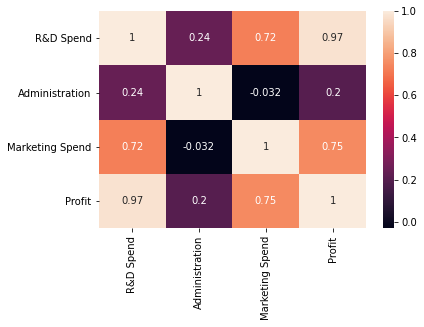

In [8]:
sns.heatmap(df.corr(), annot = True)

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

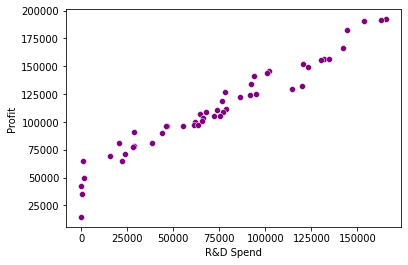

In [9]:
sns.scatterplot(x="R&D Spend",y="Profit",data=df,color="purple")

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

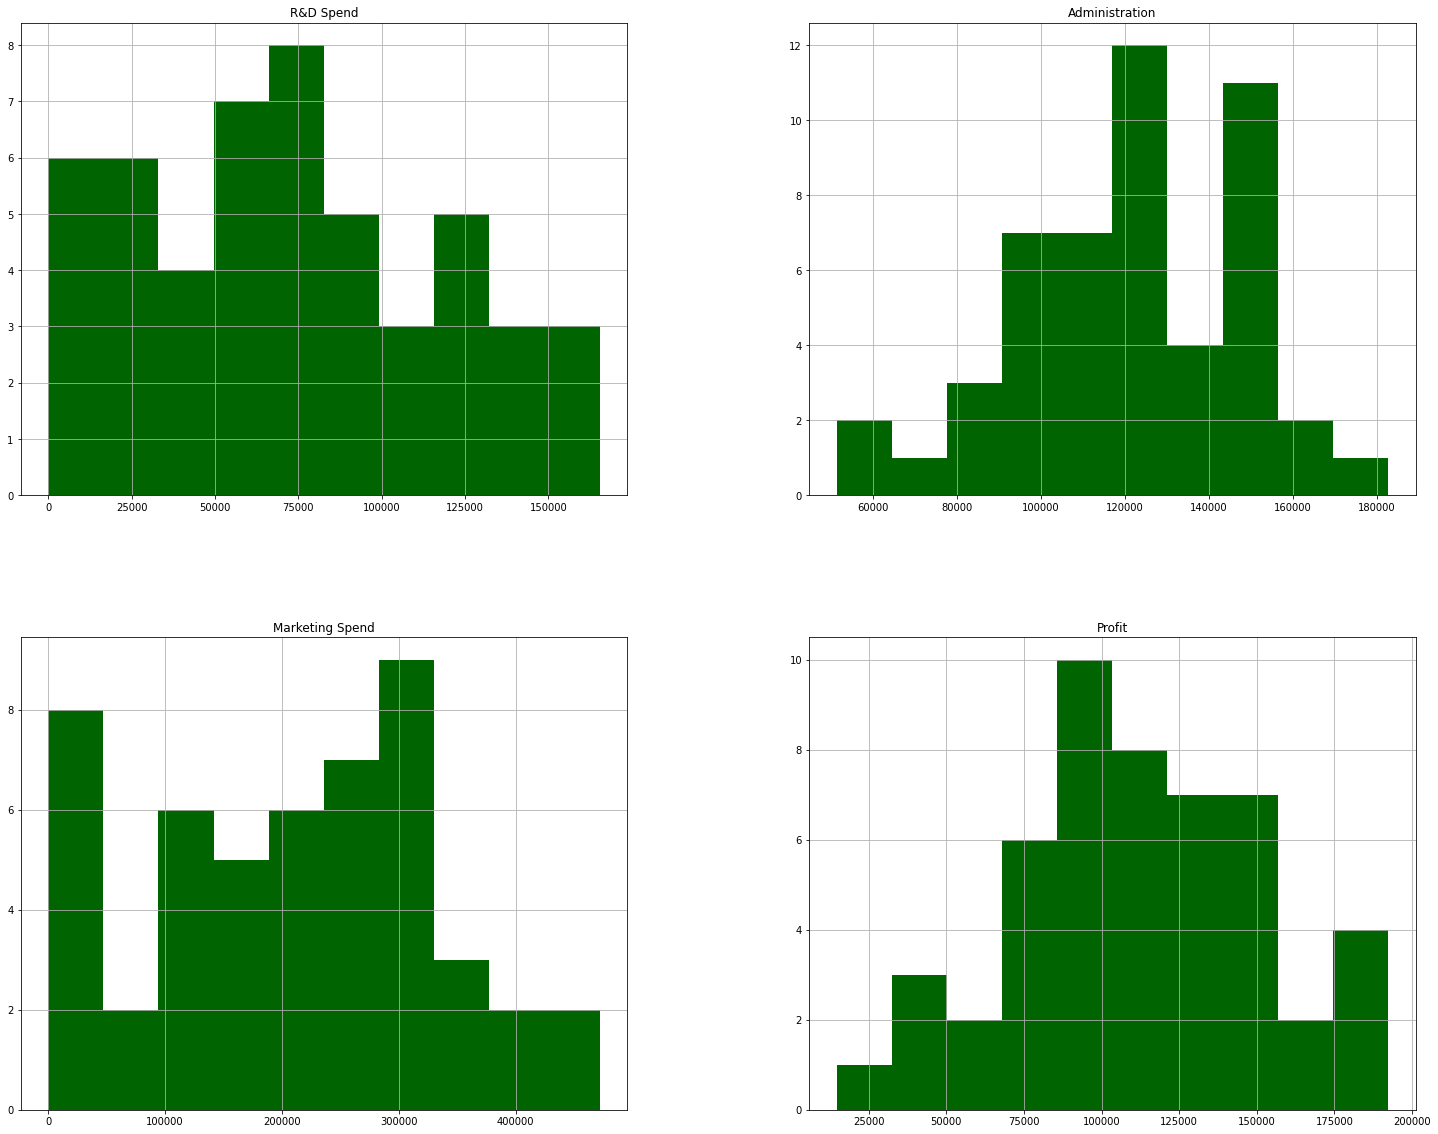

In [10]:
df.hist(figsize=(25,20),color="darkgreen")

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


State'a ait benzersiz değerleri görüntüleyelim.

In [12]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [13]:
df['State'] = pd.Categorical(df['State'])

In [14]:
dfDummies = pd.get_dummies(df['State'])

In [15]:
dfDummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [16]:
df = pd.concat([df,dfDummies],axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [17]:
df = df.drop(['State', "Florida"], axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [18]:
x = df.drop("Profit", axis = 1)
y = df["Profit"]

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [19]:
x.head()

,R&D Spend,Administration,Marketing Spend,California,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40, shuffle=1)

4 parça değişkeni kontrol edelim.

In [22]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,California,New York
16,78013.11,121597.55,264346.06,1,0
35,46014.02,85047.44,205517.64,0,1
25,64664.71,139553.16,137962.62,1,0
21,78389.47,153773.43,299737.29,0,1
44,22177.74,154806.14,28334.72,1,0


In [23]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,California,New York
33,55493.95,103057.49,214634.81,0,0
29,65605.48,153032.06,107138.38,0,1
49,0.00,116983.80,45173.06,1,0
38,20229.59,65947.93,185265.10,0,1
45,1000.23,124153.04,1903.93,0,1


In [24]:
y_train.head()

16    126992.93
35     96479.51
25    107404.34
21    111313.02
44     65200.33
Name: Profit, dtype: float64

In [25]:
y_test.head()

33     96778.92
29    101004.64
49     14681.40
38     81229.06
45     64926.08
Name: Profit, dtype: float64

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [27]:
model = lm.fit(x_train, y_train)

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [28]:
y_pred = lm.predict(x_test)
y_pred

array([ 97886.52854489, 100689.59753429,  50766.18448373,  66829.09134734,
        46799.45010527, 189232.29587132, 128691.24829828, 170348.90916942,
       135737.68395059, 180434.30891561])

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [29]:
df_comp = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmini Değerler': y_pred})
df_comp

,Gerçek Değerler,Tahmini Değerler
33,96778.92,97886.528545
29,101004.64,100689.597534
49,14681.40,50766.184484
38,81229.06,66829.091347
45,64926.08,46799.450105
0,192261.83,189232.295871
18,124266.90,128691.248298
4,166187.94,170348.909169
11,144259.40,135737.683951
2,191050.39,180434.308916


In [30]:
df_comp.corr()

,Gerçek Değerler,Tahmini Değerler
Gerçek Değerler,1.000000,0.965391
Tahmini Değerler,0.965391,1.000000


sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

In [31]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hata (MSE): " , MSE)

Ortalama Kare Hata (MSE):  207075894.9566509


In [32]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)
print("Ortalama Mutlak Hata (MAE): ", MAE)

Ortalama Mutlak Hata (MAE):  10078.668277189892


In [33]:
import math

RMSE = math.sqrt(MSE)
print('Kök Ortalama Kare Hatası (RMSE) :',RMSE )

Kök Ortalama Kare Hatası (RMSE) : 14390.131860294085


Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

In [34]:
model.score(x_train, y_train)

0.9594857796904854